In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import tilemapbase as tmb

from pluma.stream.georeference import Georeference

from pluma.schema.dataset import Dataset

%matplotlib inline
plt.style.use('ggplot')


In [2]:
stream_root_folder = r"C:\Users\neurogears\Desktop\EC_datasets\FMUL2022_10_21_11_20_53"
dataset = Dataset(stream_root_folder, datasetlabel='FMUL2022_10_21_11_20_53', georeference= Georeference())

#dataset.populate_streams(autoload = True)
#dataset.export_streams()
dataset.import_streams()



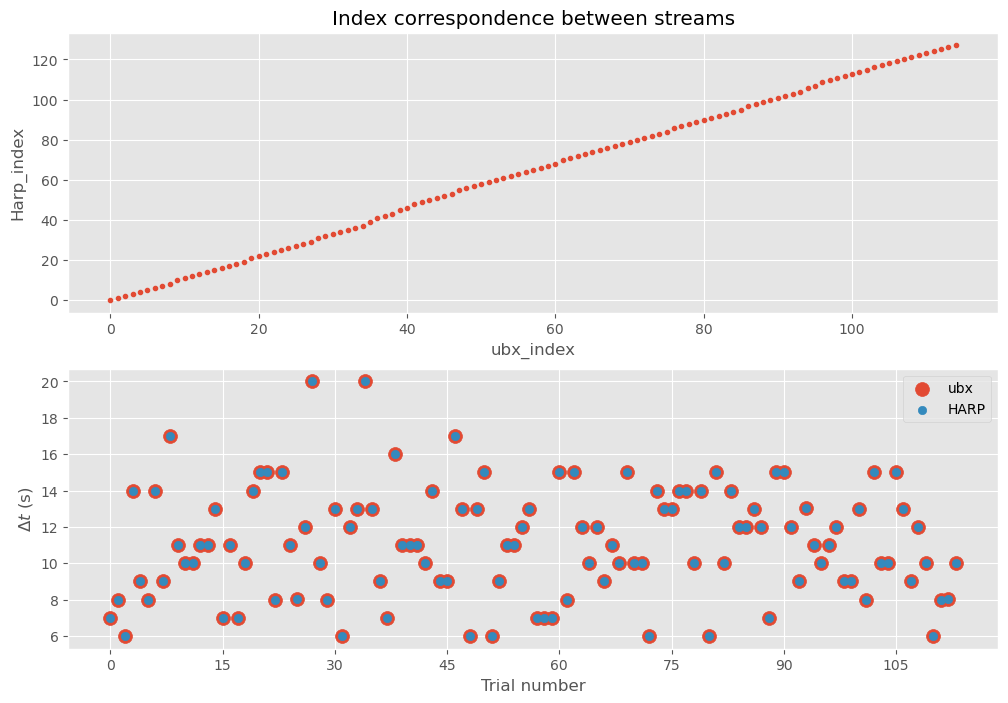

In [3]:
drift_correction_model = dataset.calibrate_ubx_to_harp(plot_diagnosis=True)
dataset.add_ubx_georeference(event = "NAV-HPPOSLLH", calibrate_clock = True)


In [4]:
dataset.georeference.spacetime

,Latitude,Longitude,Elevation,geometry
Seconds,,,,
1904-01-01 23:18:16.239324129,38.746326,-9.161714,161701.6,POINT Z (-9.16171 38.74633 161701.60000)
1904-01-01 23:18:17.239320941,38.746326,-9.161714,161461.2,POINT Z (-9.16171 38.74633 161461.20000)
1904-01-01 23:18:18.239317753,38.746326,-9.161713,161410.8,POINT Z (-9.16171 38.74633 161410.80000)
1904-01-01 23:18:19.239314565,38.746325,-9.161712,161337.7,POINT Z (-9.16171 38.74632 161337.70000)
1904-01-01 23:18:20.239311377,38.746325,-9.161712,161433.3,POINT Z (-9.16171 38.74632 161433.30000)
...,...,...,...,...
1904-01-01 23:39:54.235186223,38.746331,-9.161667,155415.2,POINT Z (-9.16167 38.74633 155415.20000)
1904-01-01 23:39:55.235183035,38.746332,-9.161668,155323.2,POINT Z (-9.16167 38.74633 155323.20000)
1904-01-01 23:39:56.235179847,38.746332,-9.161668,155290.4,POINT Z (-9.16167 38.74633 155290.40000)


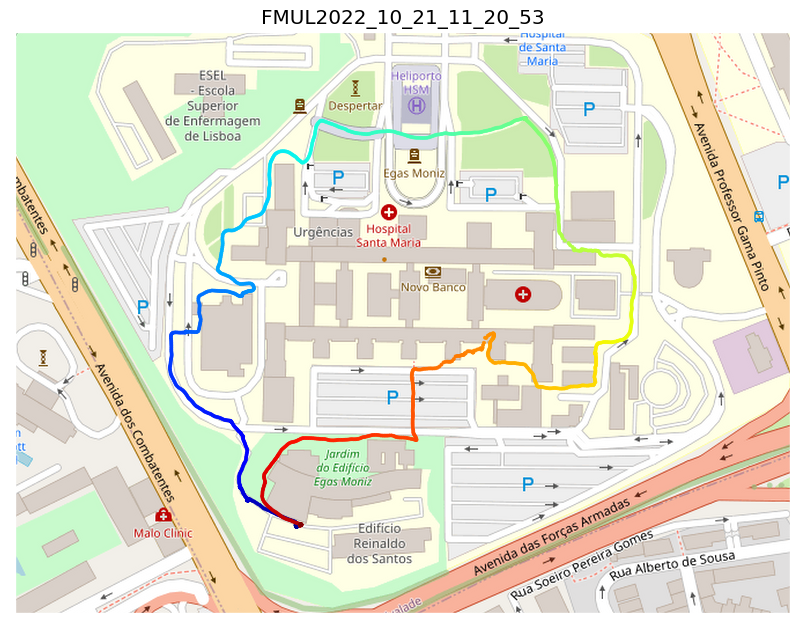

In [5]:
tiles = tmb.tiles.Stamen_Watercolour
fig = dataset.showmap(colorscale_override=dataset.georeference.spacetime.index,
                      cmap = "jet",
                      markersize= 5, figsize = (10,10),
                      )
plt.title(dataset.datasetlabel)
plt.show()


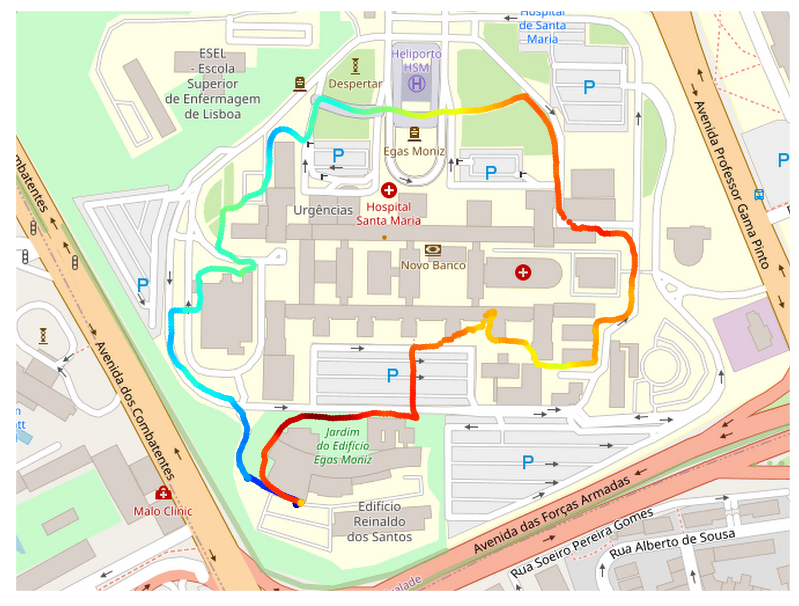

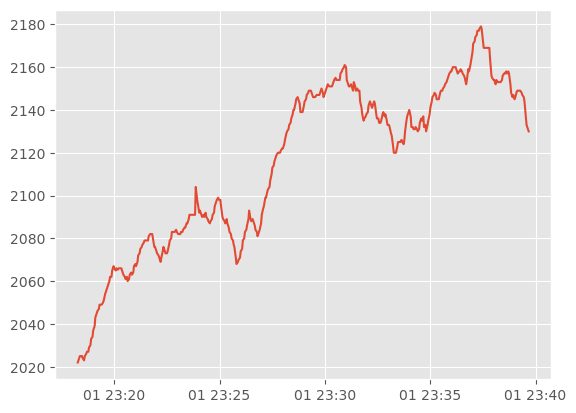

In [6]:
from pluma.preprocessing.resampling import resample_temporospatial
from pluma.plotting.maps import showmap

resampled = resample_temporospatial(dataset.streams.TK.AirQuality.Temperature.data,
                                    dataset.georeference)

fig = showmap(resampled, figsize=(10,10))
plt.show()
plt.figure
plt.plot(resampled.Data)
plt.show()


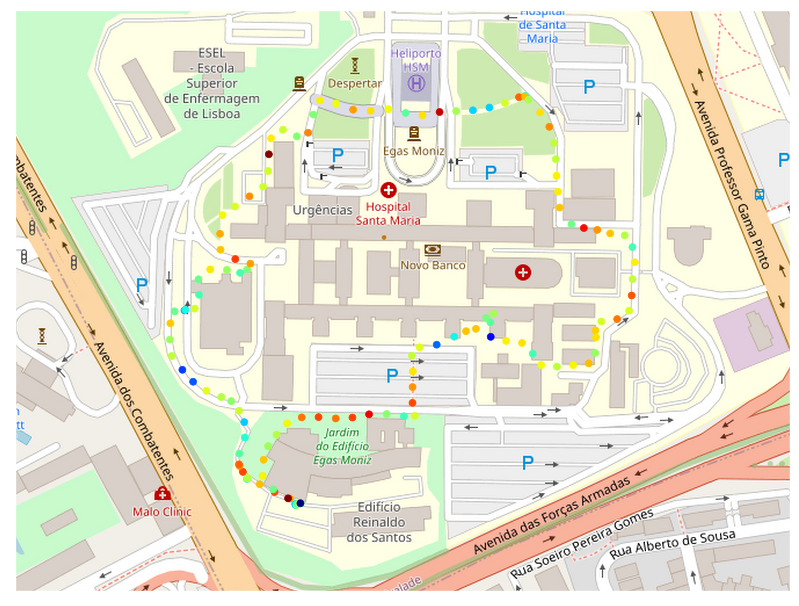

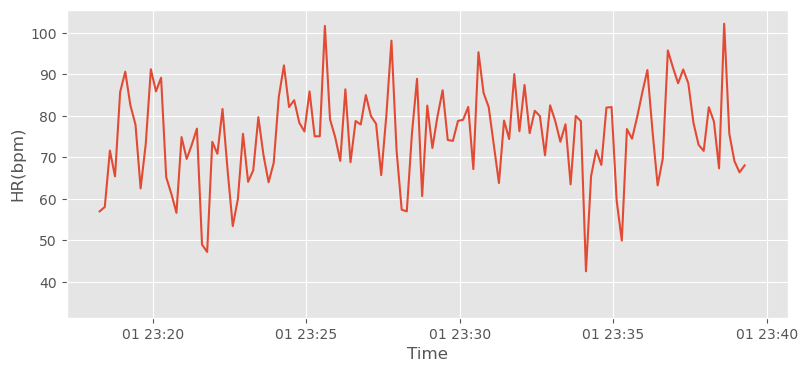

In [8]:
from pluma.preprocessing.ecg import heartrate_from_ecg

hr,_ = heartrate_from_ecg(dataset.streams.BioData.ECG,
                                         fs = 250, max_heartrate_bpm = 250.0,
                                        peak_height = 800, smooth_win = 10)

resampled = resample_temporospatial(hr, dataset.georeference,
                                           sampling_dt = datetime.timedelta(seconds = 10))
fig = showmap(resampled, figsize=(10,10), cmap = 'jet', markersize = 25 )
plt.show()
plt.figure(figsize= (9.3,4))
plt.plot(resampled.Data)
plt.xlabel('Time')
plt.ylabel('HR(bpm)')
plt.show()

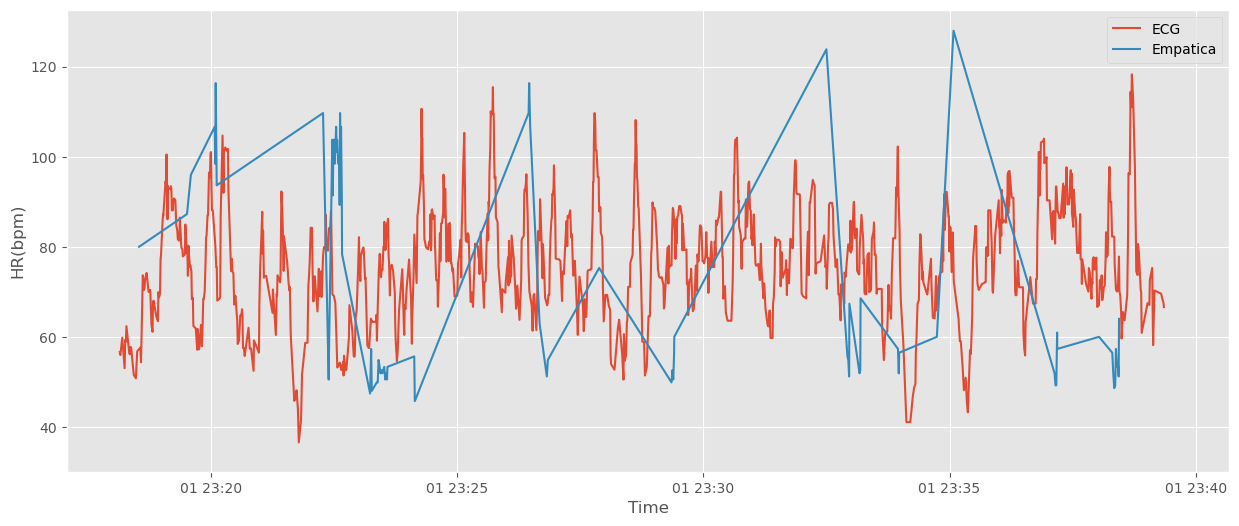

In [10]:
plt.figure(figsize=(15,6))
plt.plot(hr, label = 'ECG')
plt.plot(dataset.streams.Empatica.data.E4_Hr['Value'], label = 'Empatica')
plt.xlabel("Time")
plt.ylabel("HR(bpm)")
plt.legend()
plt.show()